In [123]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



%matplotlib inline

# Input

Vamos gerar uma base de dados de 2 mil linhas, com duas colunas idades e salários.

* Idade vai variar entre 18 e 95.
* Sarios vai variar entre 1300 e 100000

In [124]:
df = pd.read_csv("fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [125]:
df = df.rename(columns={
    'baseline value': 'valor_basal',
    'accelerations': 'aceleracoes',
    'fetal_movement': 'movimento_fetal',
    'uterine_contractions': 'contracoes_uterinas',
    'light_decelerations': 'desaceleracoes_leves',
    'severe_decelerations': 'desaceleracoes_severas',
    'prolongued_decelerations': 'desaceleracoes_prolongadas',
    'abnormal_short_term_variability': 'variabilidade_curto_prazo_anormal',
    'mean_value_of_short_term_variability': 'media_variabilidade_curto_prazo',
    'percentage_of_time_with_abnormal_long_term_variability': 'porcentagem_tempo_variabilidade_longo_prazo_anormal',
    'mean_value_of_long_term_variability': 'media_variabilidade_longo_prazo',
    'histogram_width': 'largura_histograma',
    'histogram_min': 'minimo_histograma',
    'histogram_max': 'maximo_histograma',
    'histogram_number_of_peaks': 'numero_picos_histograma',
    'histogram_number_of_zeroes': 'numero_zeros_histograma',
    'histogram_mode': 'modo_histograma',
    'histogram_mean': 'media_histograma',
    'histogram_median': 'mediana_histograma',
    'histogram_variance': 'variancia_histograma',
    'histogram_tendency': 'tendencia_histograma',
    'fetal_health': 'saude_fetal'
})

df.head()

,valor_basal,aceleracoes,movimento_fetal,contracoes_uterinas,desaceleracoes_leves,desaceleracoes_severas,desaceleracoes_prolongadas,variabilidade_curto_prazo_anormal,media_variabilidade_curto_prazo,porcentagem_tempo_variabilidade_longo_prazo_anormal,...,minimo_histograma,maximo_histograma,numero_picos_histograma,numero_zeros_histograma,modo_histograma,media_histograma,mediana_histograma,variancia_histograma,tendencia_histograma,saude_fetal
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   valor_basal                                          2126 non-null   float64
 1   aceleracoes                                          2126 non-null   float64
 2   movimento_fetal                                      2126 non-null   float64
 3   contracoes_uterinas                                  2126 non-null   float64
 4   desaceleracoes_leves                                 2126 non-null   float64
 5   desaceleracoes_severas                               2126 non-null   float64
 6   desaceleracoes_prolongadas                           2126 non-null   float64
 7   variabilidade_curto_prazo_anormal                    2126 non-null   float64
 8   media_variabilidade_curto_prazo                      2126 non-null  

In [127]:
# Visualizar as informações da base de dados
print("Shape (linhas, colunas):", df.shape)
print("\nTipos de dados:\n", df.dtypes)

Shape (linhas, colunas): (2126, 22)

Tipos de dados:
 valor_basal                                            float64
aceleracoes                                            float64
movimento_fetal                                        float64
contracoes_uterinas                                    float64
desaceleracoes_leves                                   float64
desaceleracoes_severas                                 float64
desaceleracoes_prolongadas                             float64
variabilidade_curto_prazo_anormal                      float64
media_variabilidade_curto_prazo                        float64
porcentagem_tempo_variabilidade_longo_prazo_anormal    float64
media_variabilidade_longo_prazo                        float64
largura_histograma                                     float64
minimo_histograma                                      float64
maximo_histograma                                      float64
numero_picos_histograma                                float64
n

In [128]:
# Tratamento dos dados nulos
print("Dados nulos:")
print(df.isnull().sum())

Dados nulos:
valor_basal                                            0
aceleracoes                                            0
movimento_fetal                                        0
contracoes_uterinas                                    0
desaceleracoes_leves                                   0
desaceleracoes_severas                                 0
desaceleracoes_prolongadas                             0
variabilidade_curto_prazo_anormal                      0
media_variabilidade_curto_prazo                        0
porcentagem_tempo_variabilidade_longo_prazo_anormal    0
media_variabilidade_longo_prazo                        0
largura_histograma                                     0
minimo_histograma                                      0
maximo_histograma                                      0
numero_picos_histograma                                0
numero_zeros_histograma                                0
modo_histograma                                        0
media_histograma  

In [129]:
df.corr().round(2)

,valor_basal,aceleracoes,movimento_fetal,contracoes_uterinas,desaceleracoes_leves,desaceleracoes_severas,desaceleracoes_prolongadas,variabilidade_curto_prazo_anormal,media_variabilidade_curto_prazo,porcentagem_tempo_variabilidade_longo_prazo_anormal,...,minimo_histograma,maximo_histograma,numero_picos_histograma,numero_zeros_histograma,modo_histograma,media_histograma,mediana_histograma,variancia_histograma,tendencia_histograma,saude_fetal
valor_basal,1.00,-0.08,-0.03,-0.15,-0.16,-0.05,-0.10,0.31,-0.28,0.29,...,0.36,0.28,-0.11,-0.00,0.71,0.72,0.79,-0.13,0.29,0.15
aceleracoes,-0.08,1.00,0.05,0.09,-0.11,-0.04,-0.13,-0.28,0.21,-0.37,...,-0.15,0.39,0.19,-0.01,0.24,0.27,0.27,0.13,0.03,-0.36
movimento_fetal,-0.03,0.05,1.00,-0.07,0.05,-0.01,0.27,-0.10,0.12,-0.07,...,-0.15,0.10,0.16,-0.02,-0.06,-0.09,-0.07,0.18,-0.00,0.09
contracoes_uterinas,-0.15,0.09,-0.07,1.00,0.29,0.01,0.08,-0.23,0.29,-0.31,...,-0.11,0.12,0.08,0.06,-0.10,-0.19,-0.14,0.24,-0.07,-0.20
desaceleracoes_leves,-0.16,-0.11,0.05,0.29,1.00,0.11,0.23,-0.12,0.56,-0.27,...,-0.55,0.22,0.40,0.24,-0.35,-0.53,-0.39,0.56,0.00,0.06
desaceleracoes_severas,-0.05,-0.04,-0.01,0.01,0.11,1.00,0.01,0.03,0.03,-0.03,...,-0.07,-0.02,0.01,0.04,-0.22,-0.16,-0.16,0.14,-0.07,0.13
desaceleracoes_prolongadas,-0.10,-0.13,0.27,0.08,0.23,0.01,1.00,0.05,0.27,-0.14,...,-0.28,0.12,0.22,0.06,-0.44,-0.49,-0.44,0.50,-0.22,0.48
variabilidade_curto_prazo_anormal,0.31,-0.28,-0.10,-0.23,-0.12,0.03,0.05,1.00,-0.43,0.46,...,0.28,-0.11,-0.17,-0.15,0.06,0.07,0.12,-0.15,-0.01,0.47
media_variabilidade_curto_prazo,-0.28,0.21,0.12,0.29,0.56,0.03,0.27,-0.43,1.00,-0.47,...,-0.62,0.41,0.50,0.27,-0.31,-0.45,-0.34,0.56,-0.07,-0.10
porcentagem_tempo_variabilidade_longo_prazo_anormal,0.29,-0.37,-0.07,-0.31,-0.27,-0.03,-0.14,0.46,-0.47,1.00,...,0.42,-0.28,-0.28,-0.12,0.17,0.22,0.19,-0.28,0.04,0.43


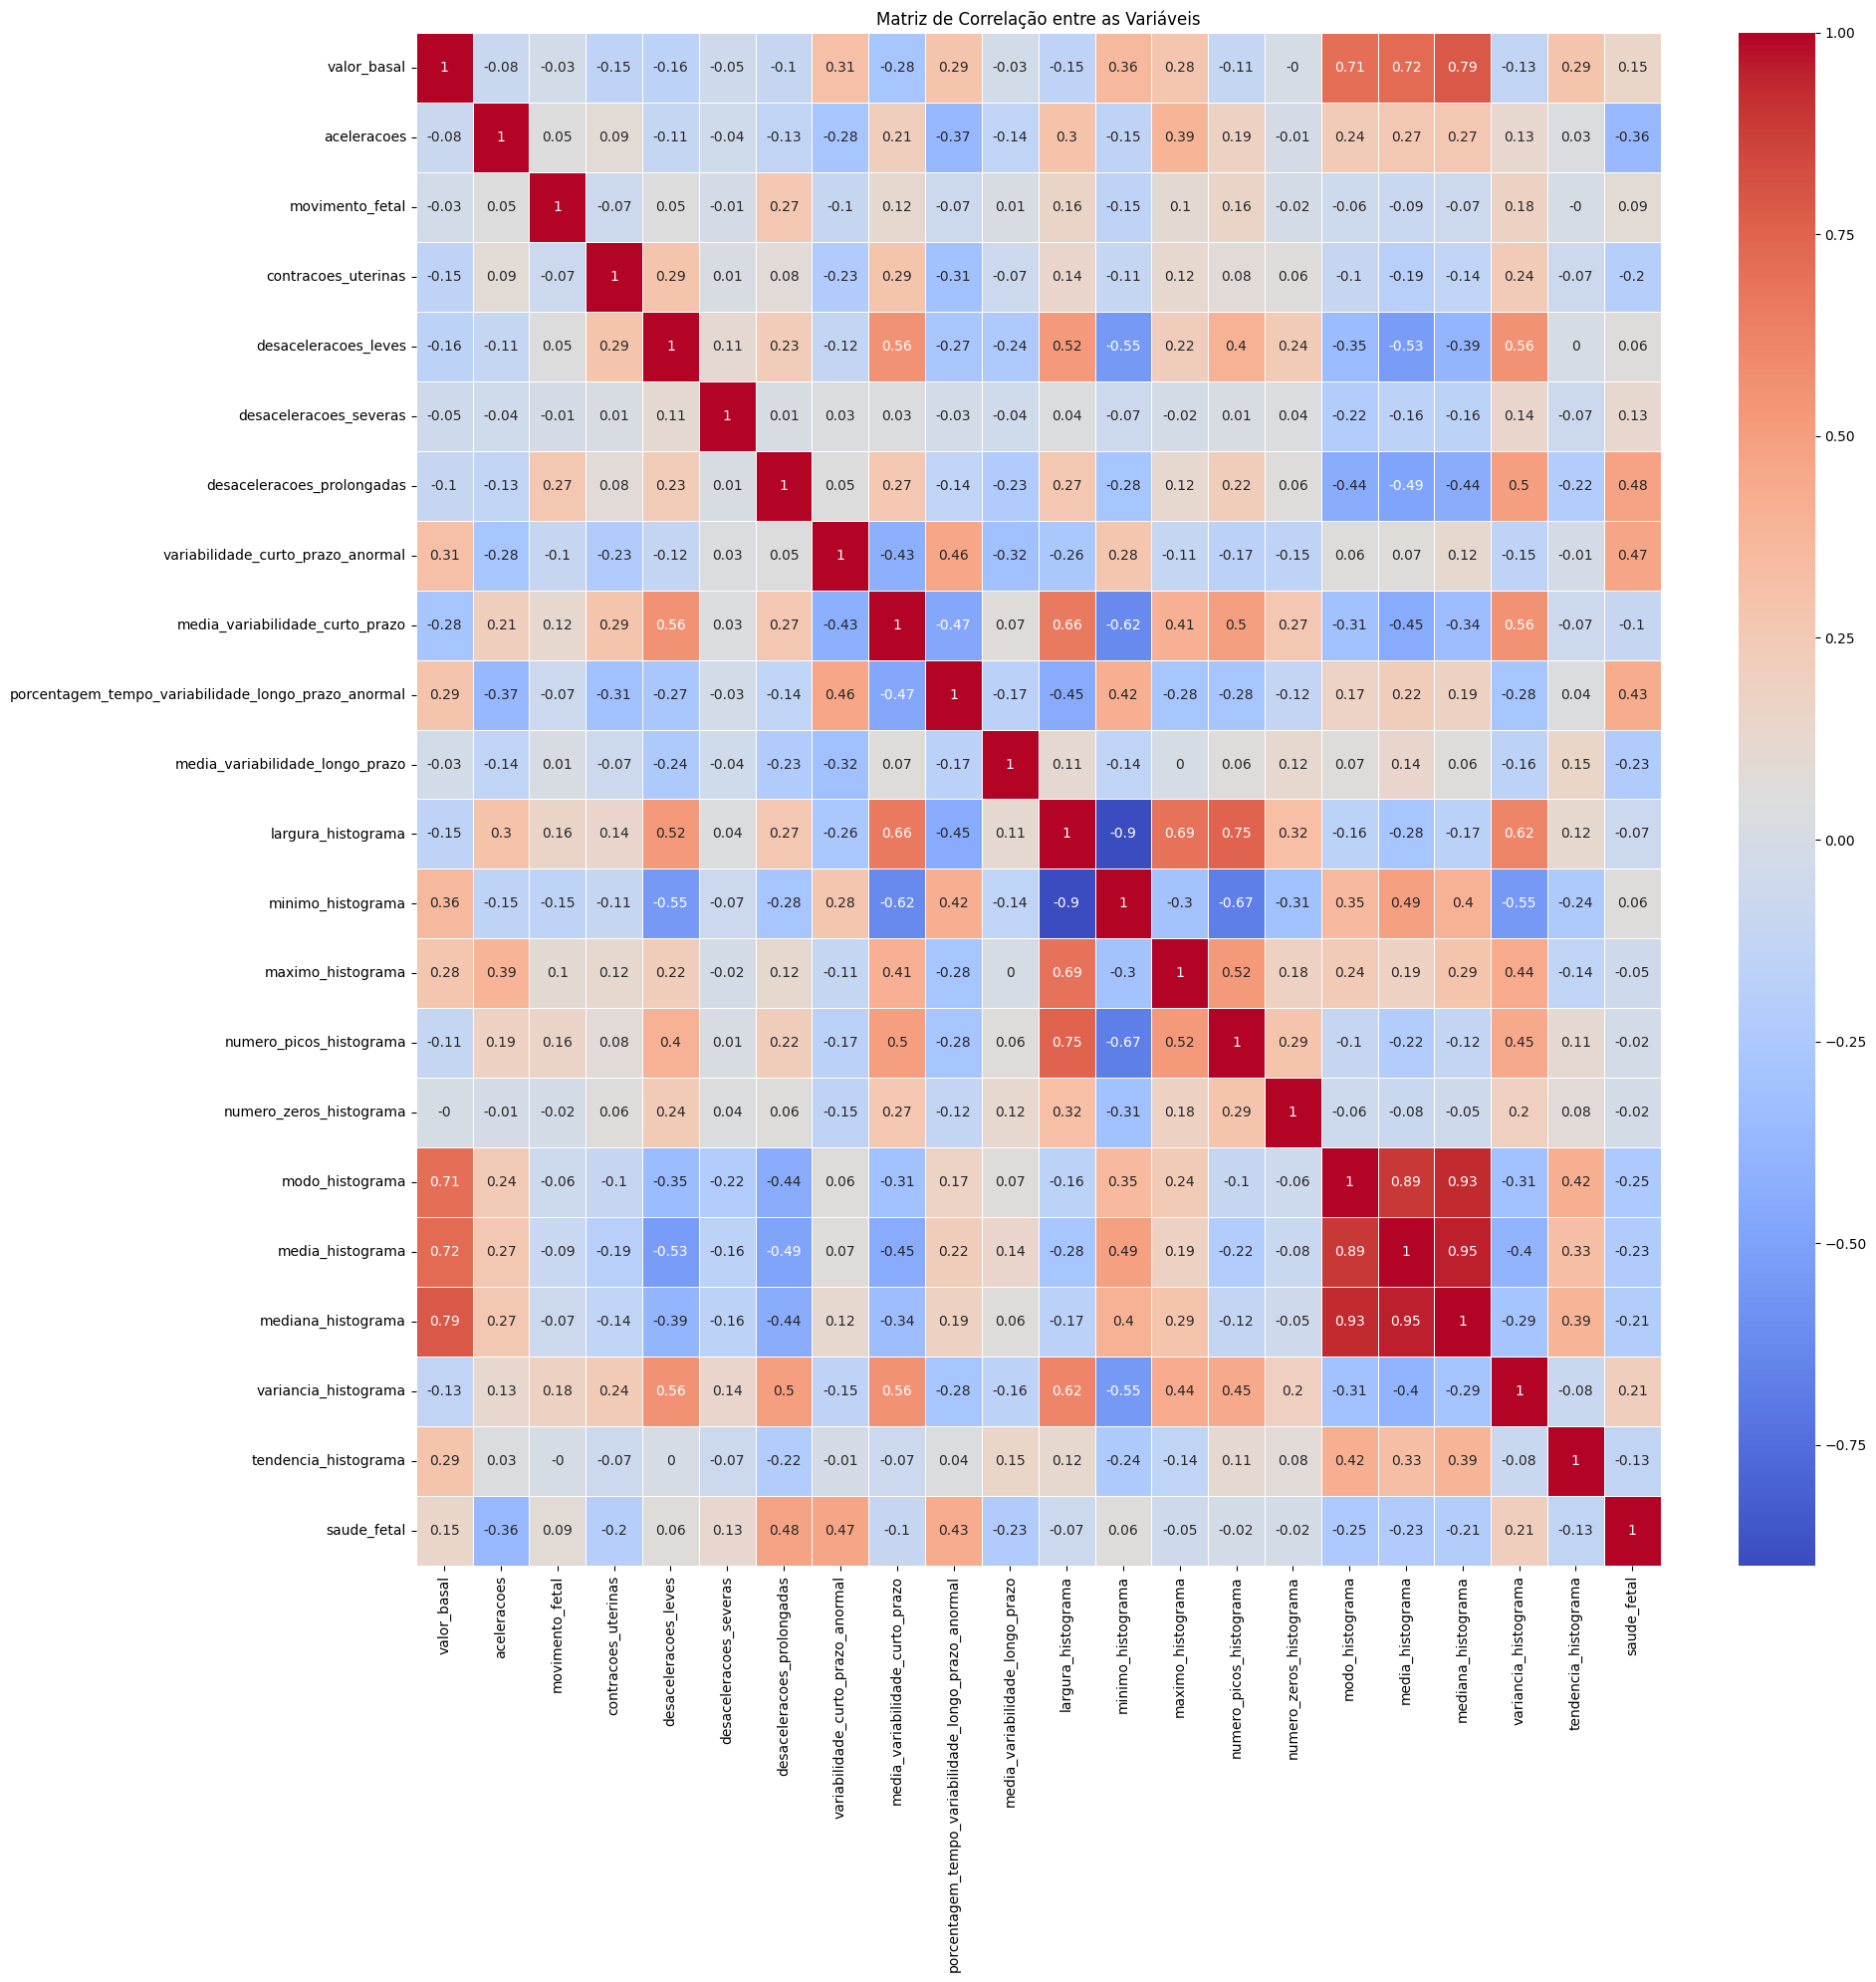

In [130]:
# Calcula a matriz de correlação (com 2 casas decimais)
correlation_matrix = df.corr().round(2)

# Gera o gráfico de calor (heatmap)
plt.figure(figsize=(20, 20))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre as Variáveis')
plt.tight_layout()
plt.show()

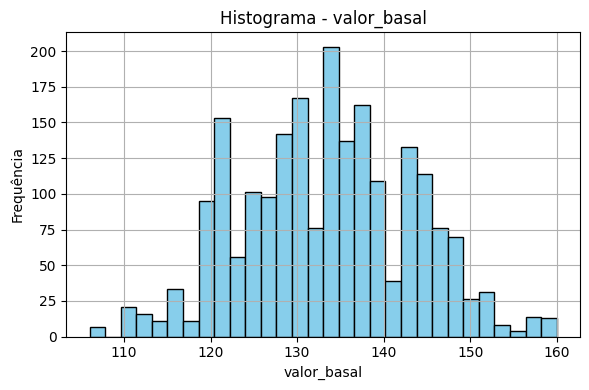

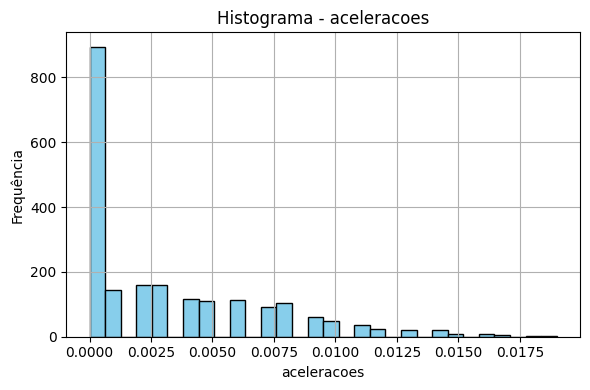

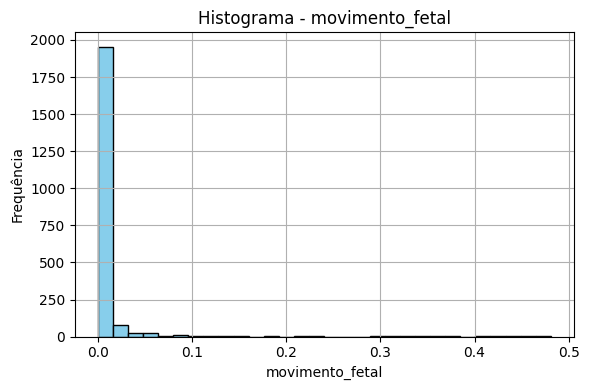

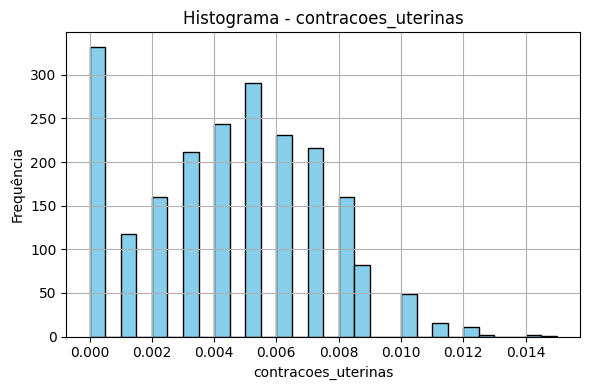

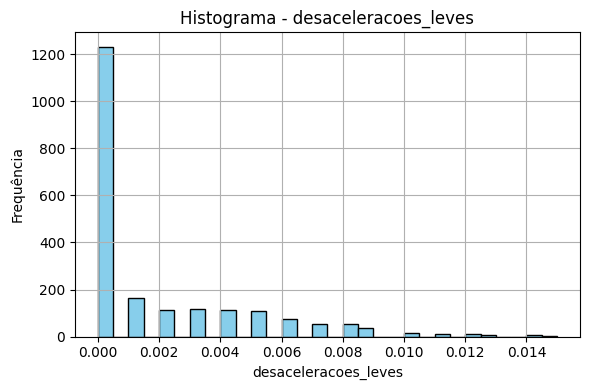

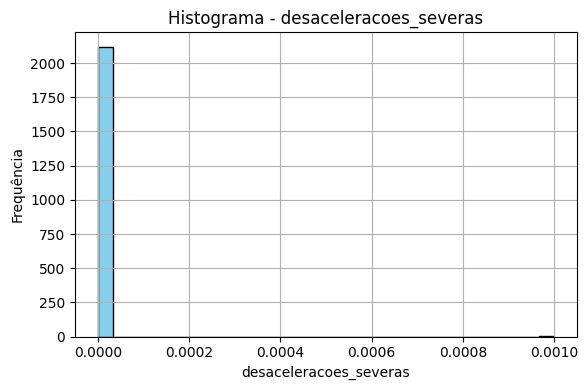

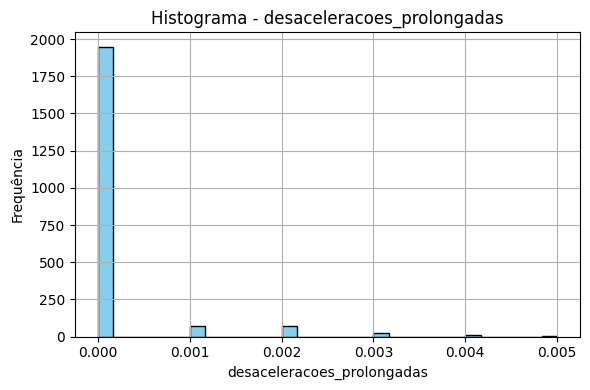

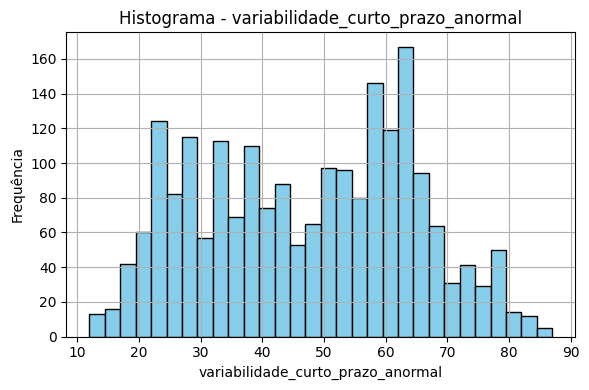

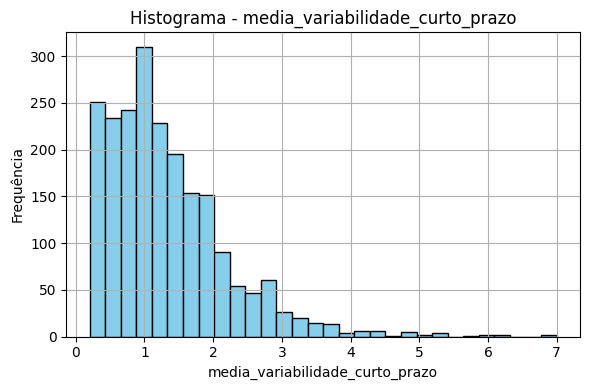

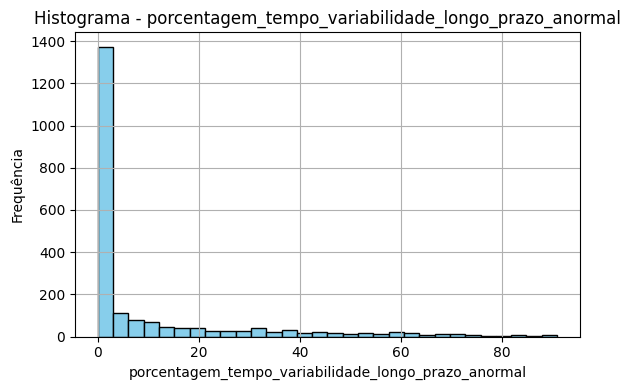

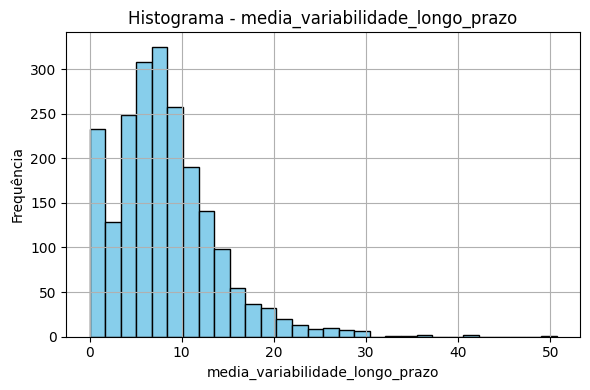

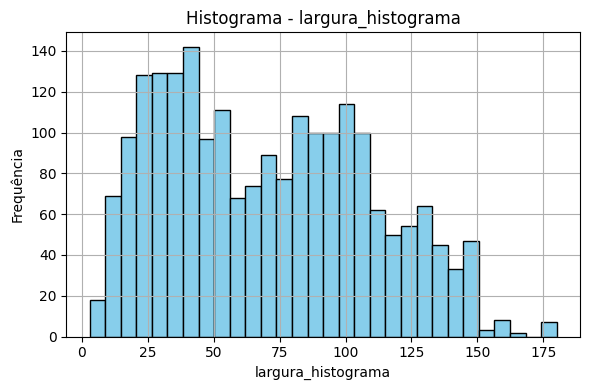

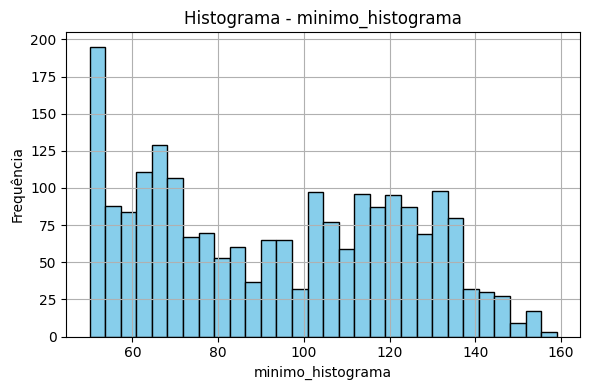

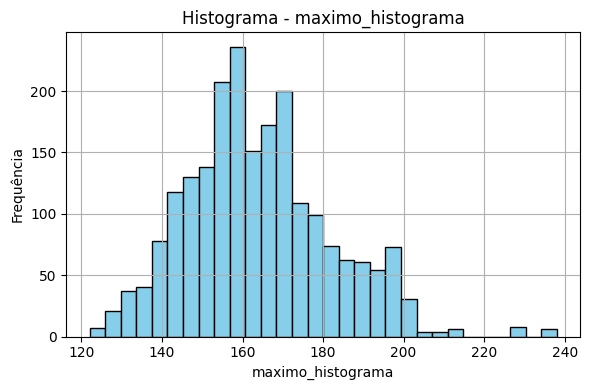

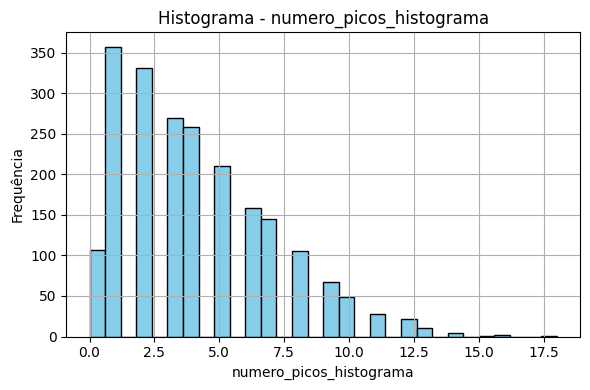

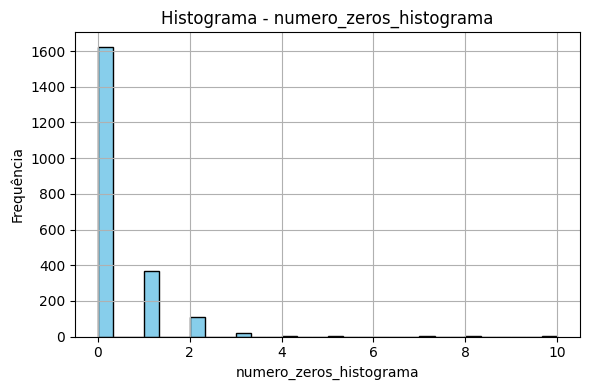

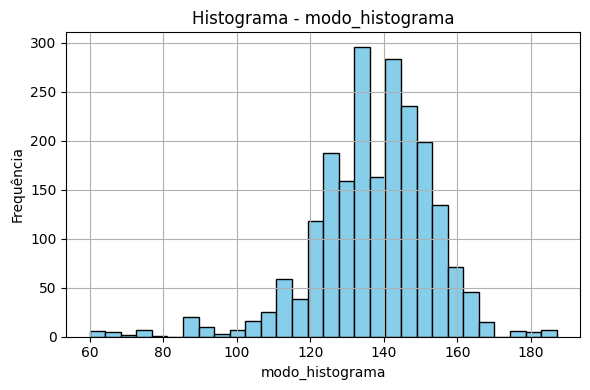

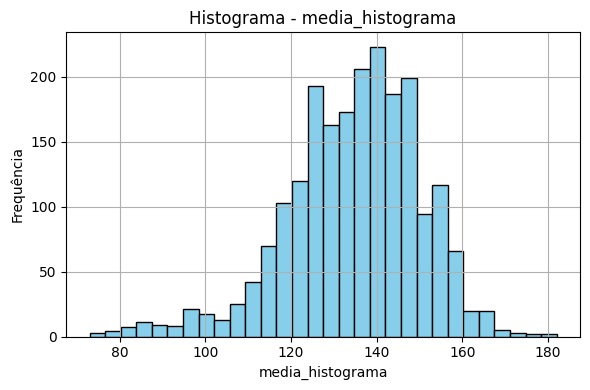

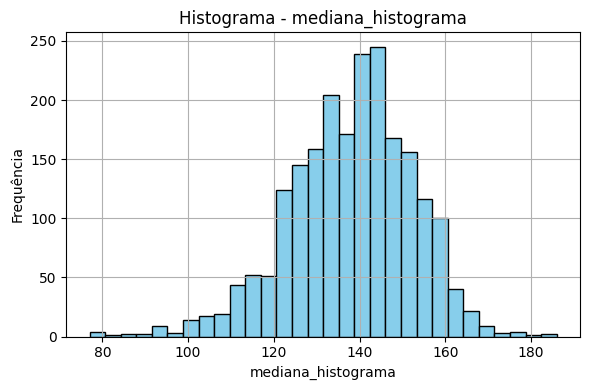

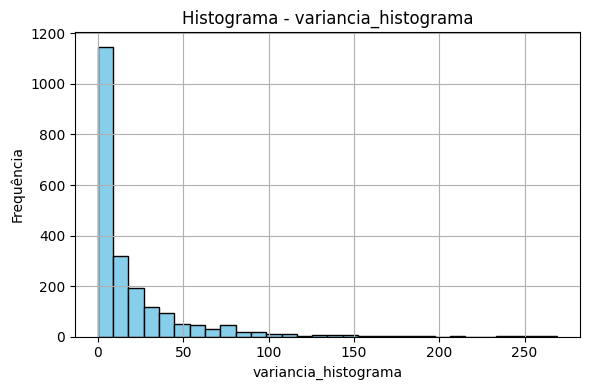

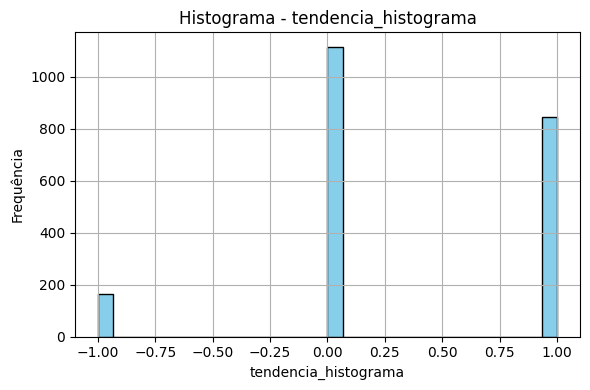

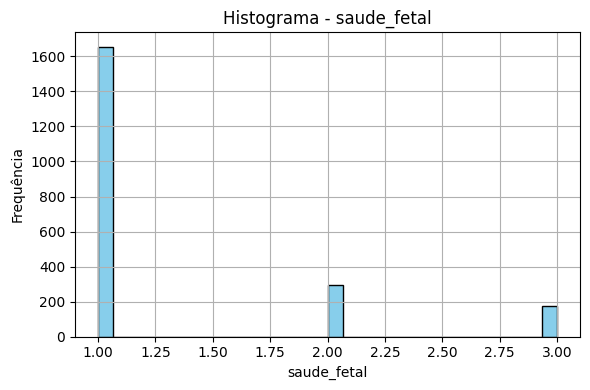

In [131]:
for coluna in df.columns:
    plt.figure(figsize=(6, 4))
    plt.hist(df[coluna], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.tight_layout()
    plt.show()



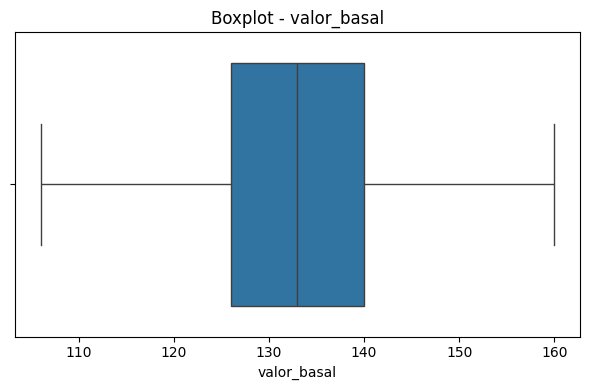

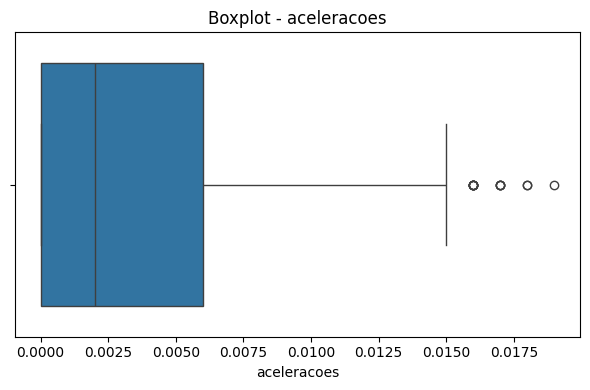

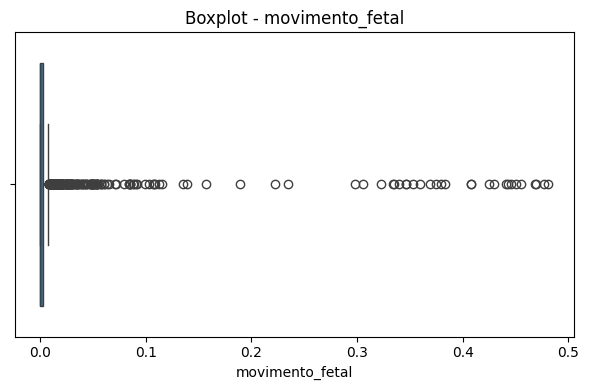

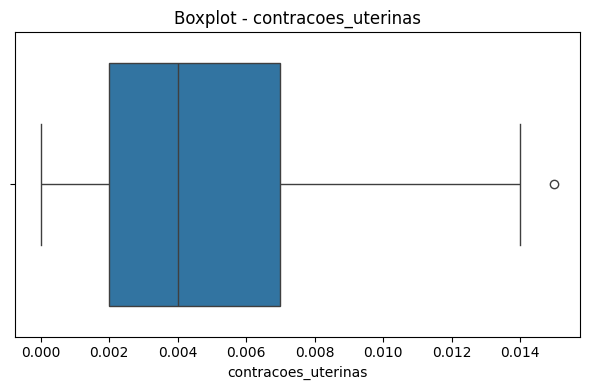

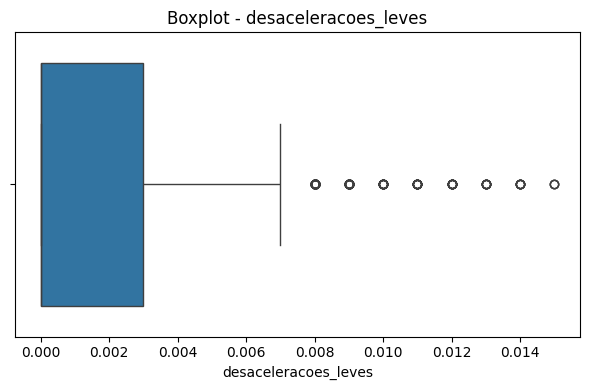

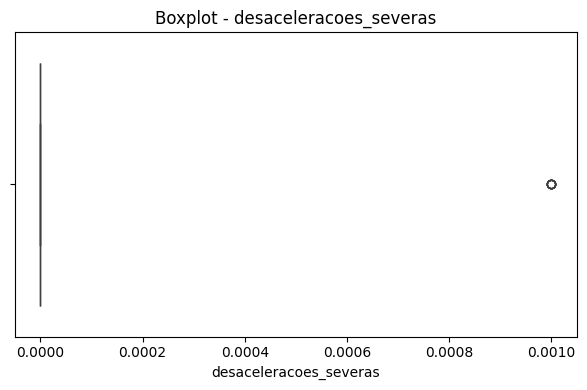

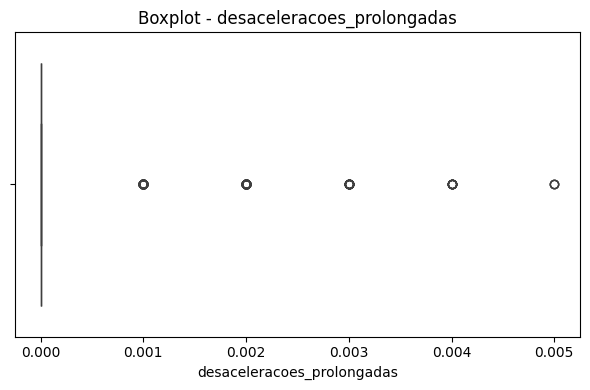

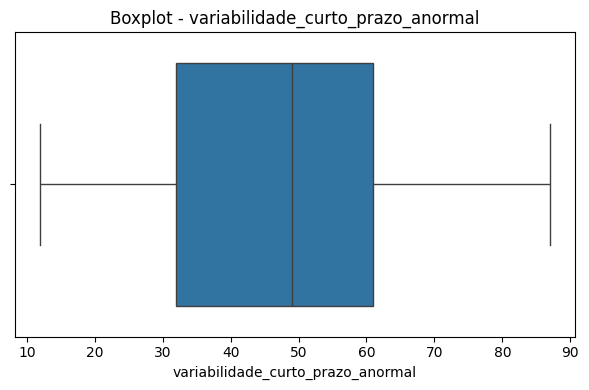

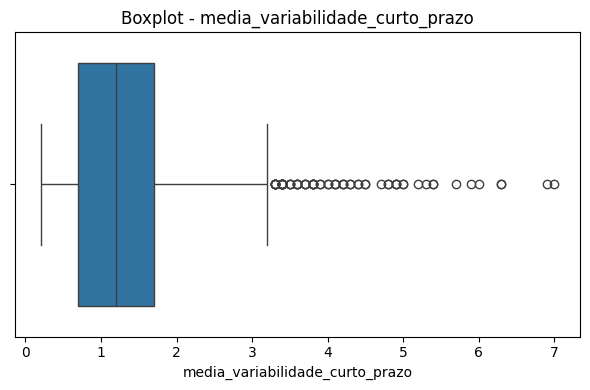

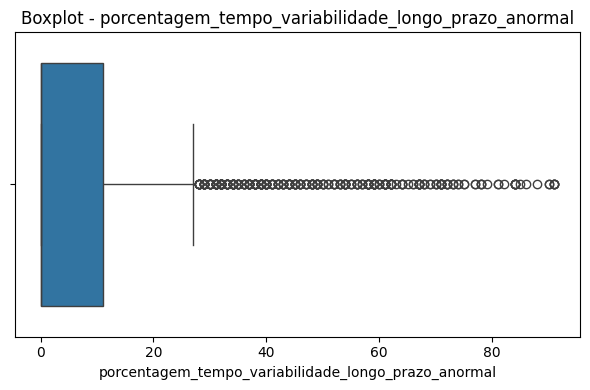

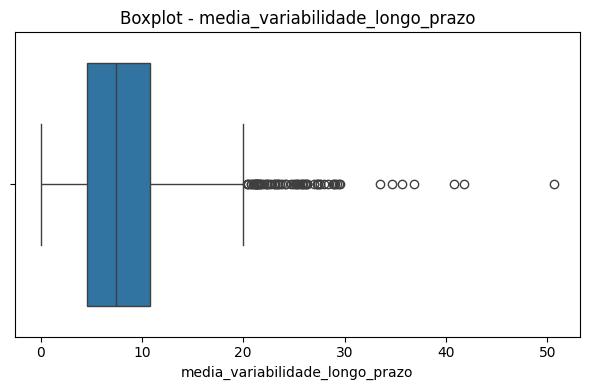

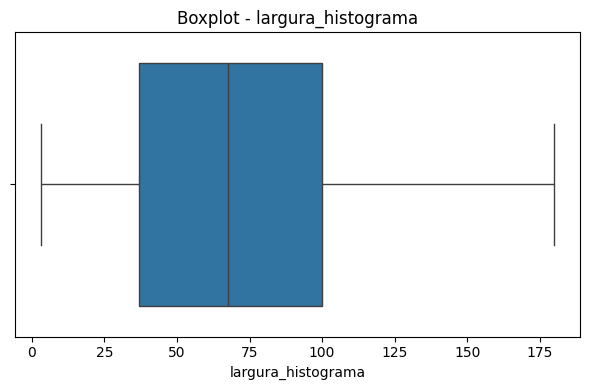

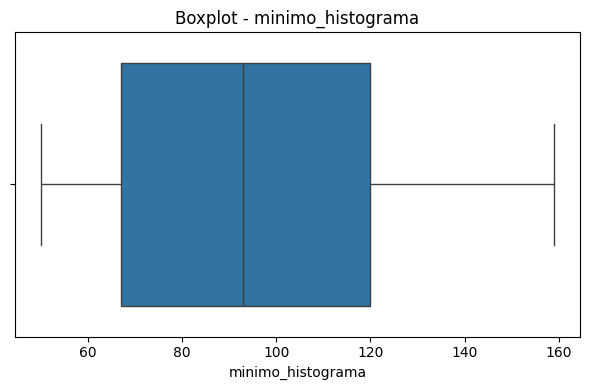

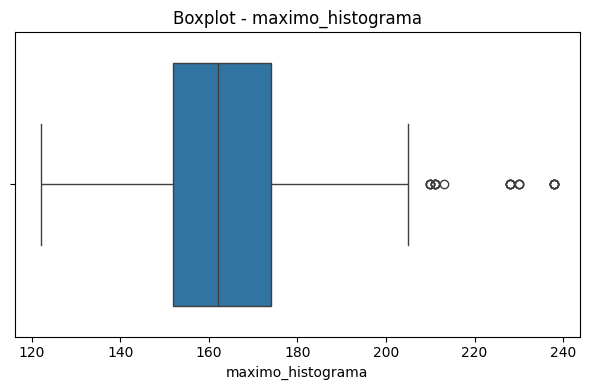

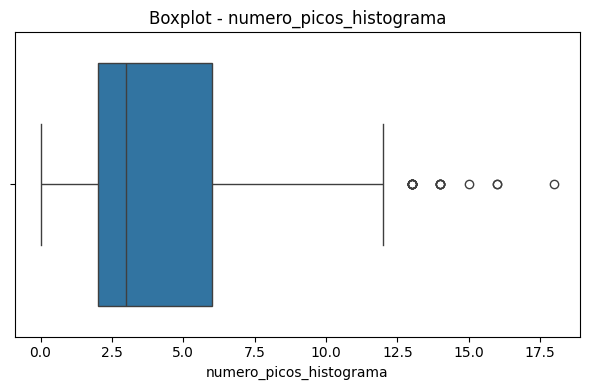

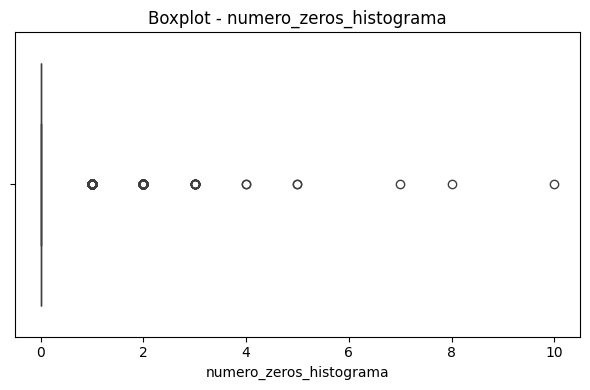

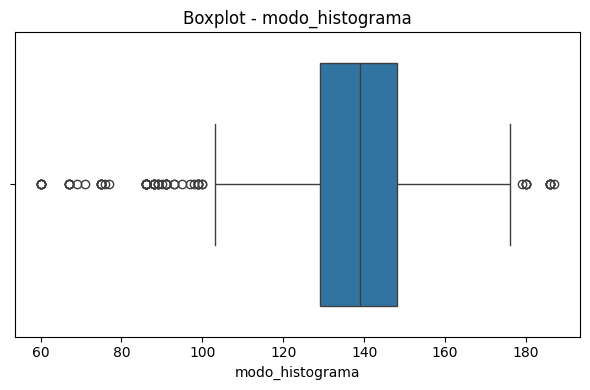

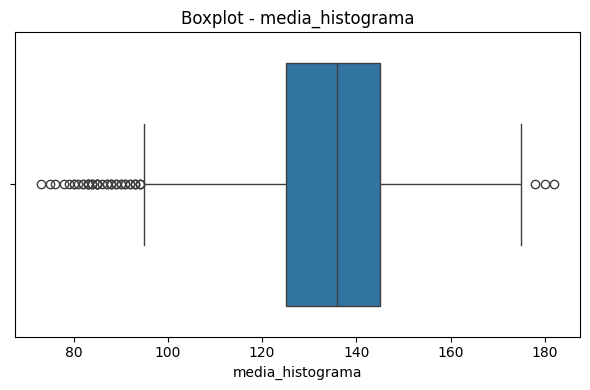

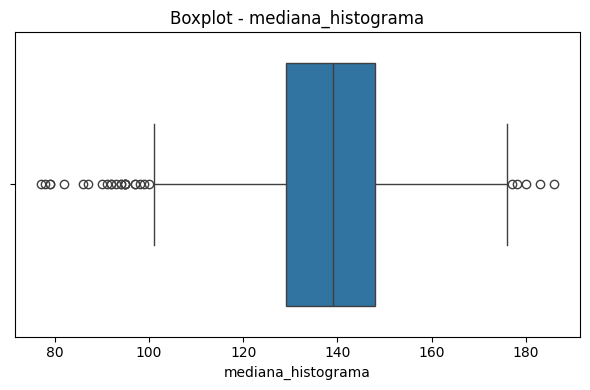

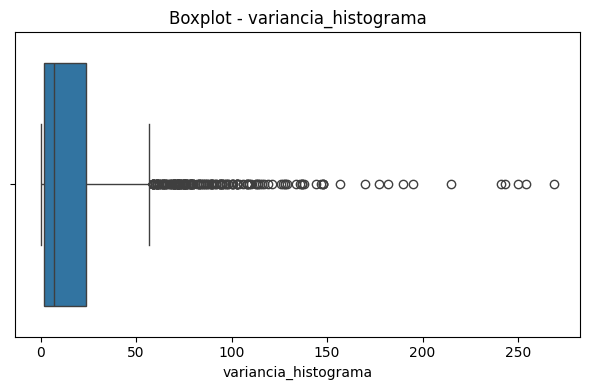

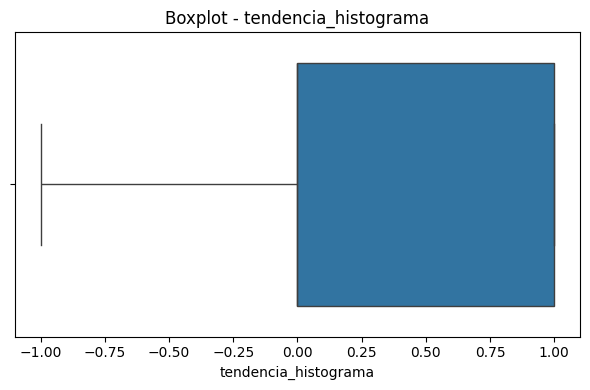

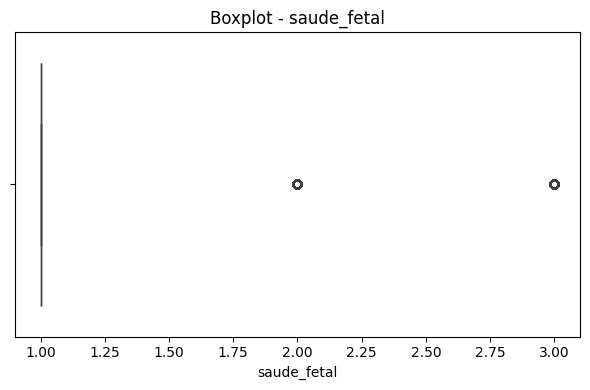

In [132]:
for coluna in df.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[coluna])
    plt.title(f'Boxplot - {coluna}')
    plt.xlabel(coluna)
    plt.tight_layout()
    plt.show()

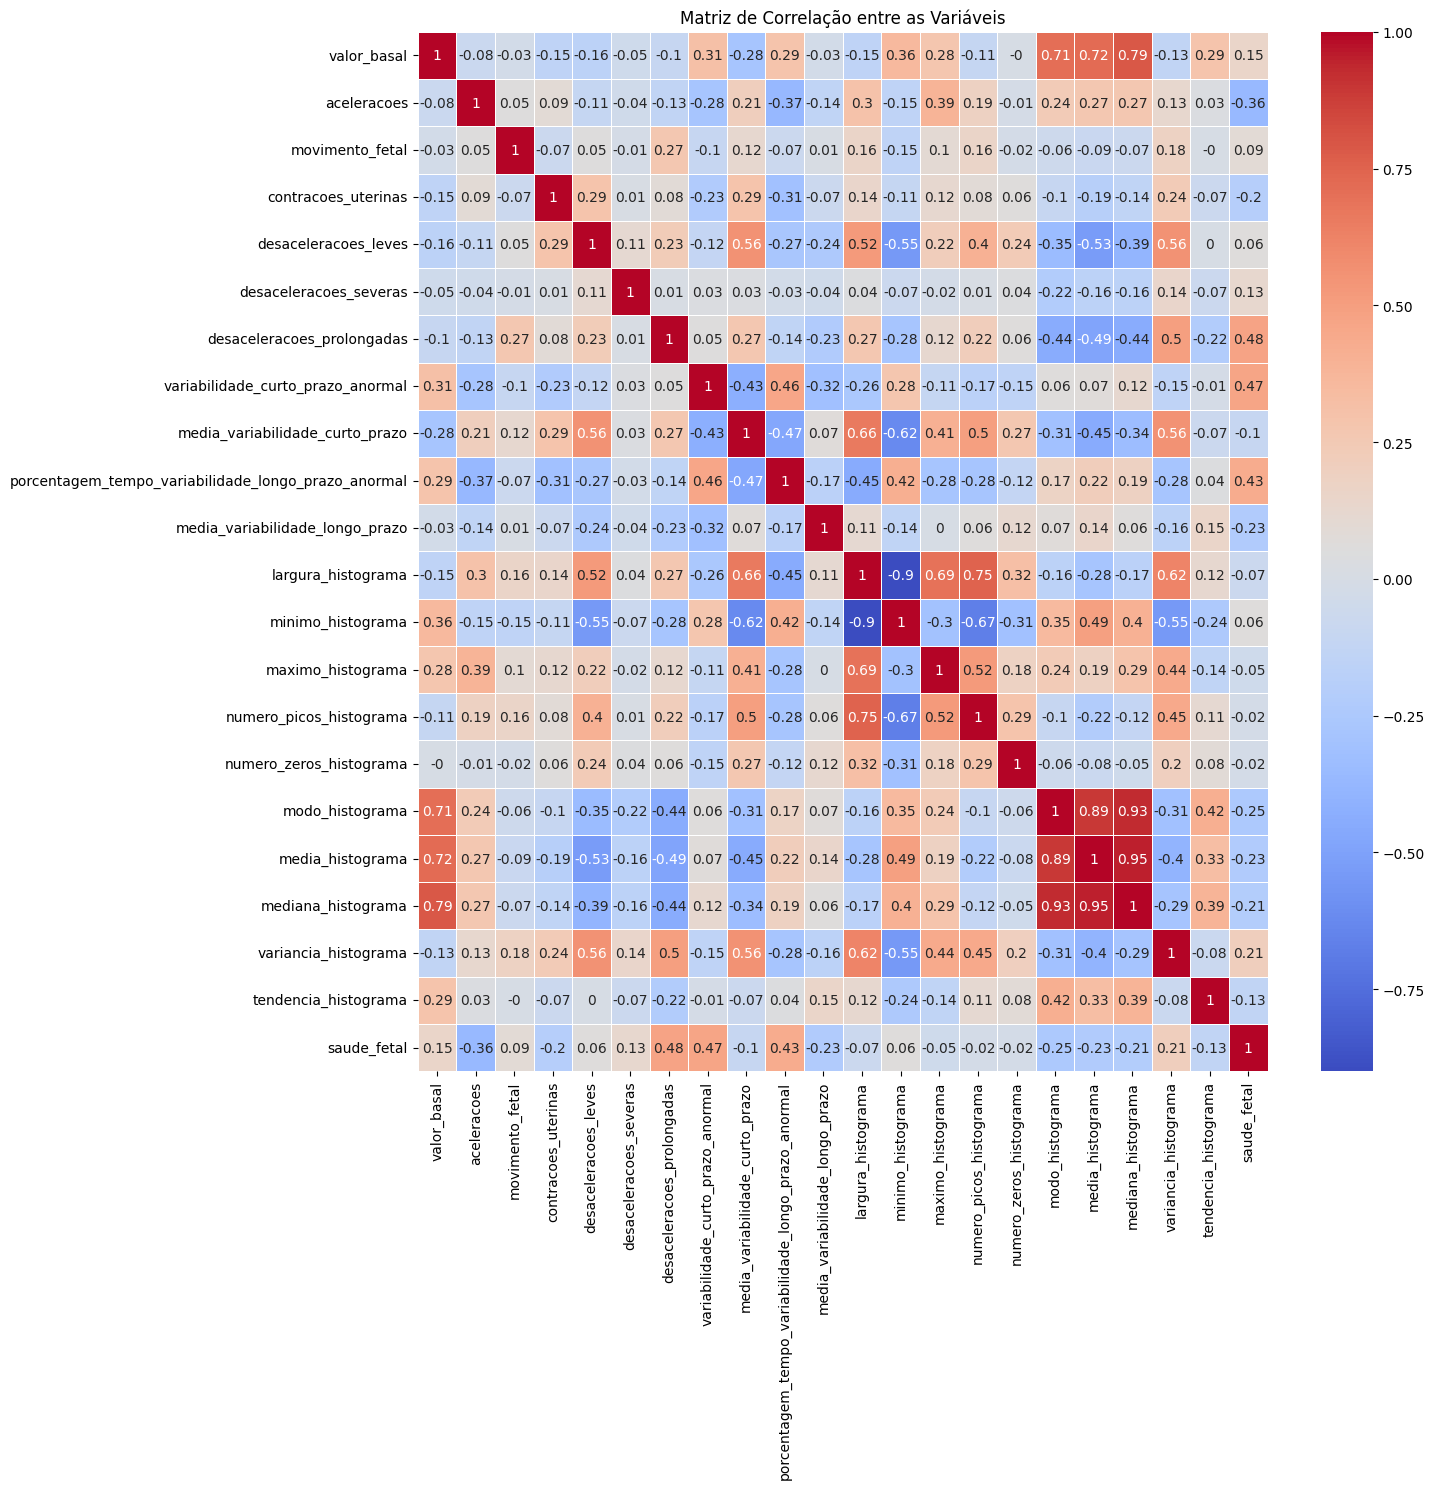

In [133]:
# Calcula a matriz de correlação (com 2 casas decimais)
correlation_matrix = df.corr().round(2)

# Gera o gráfico de calor (heatmap)
plt.figure(figsize=(15, 15))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação entre as Variáveis')
plt.tight_layout()
plt.show()

* Vídeo didático explicando o funcionando do kmeans:

---



https://youtu.be/OWyWevKhM0c?si=WqtawW-cgtNtXRQo

/tmp/ipython-input-624658123.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='saude_fetal', data=df, palette='pastel')  # Certifique-se que a coluna se chama 'saude_fetal'


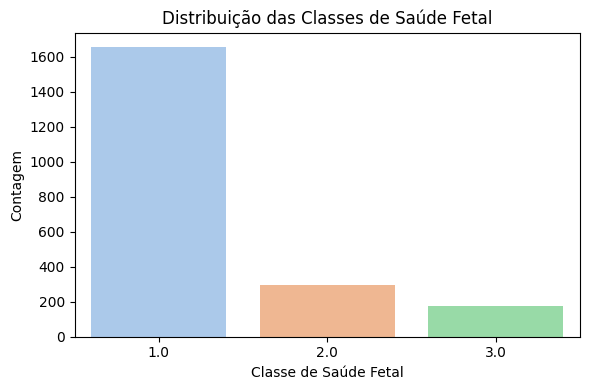

In [134]:
# 2. Análise exploratória: distribuição da variável alvo
plt.figure(figsize=(6, 4))
sns.countplot(x='saude_fetal', data=df, palette='pastel')  # Certifique-se que a coluna se chama 'saude_fetal'
plt.title('Distribuição das Classes de Saúde Fetal')
plt.xlabel('Classe de Saúde Fetal')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()

In [135]:
# 3. Separar features (X) e target (y)
X = df.drop("saude_fetal", axis=1)

# Mapeia as classes da variável alvo para inteiros: 0, 1, 2
y = df["saude_fetal"].map({
    1.0: 0,  # Normal
    2.0: 1,  # Suspeita
    3.0: 2   # Patológica
})

In [136]:
from sklearn.model_selection import train_test_split

# 4. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,          # 20% dos dados para teste
    stratify=y,             # Mantém a proporção de classes
    random_state=42         # Para reprodutibilidade
)

In [137]:
# 5. Normalização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [138]:
# Transformar de volta em DataFrame para manter nomes das colunas
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [139]:
# 6. Comparar modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name}: Acurácia média = {scores.mean():.4f}")

Random Forest: Acurácia média = 0.9435


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:30:24] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:30:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:30:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:30:25] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [20:30:25] WARNING: /w

XGBoost: Acurácia média = 0.9518
Logistic Regression: Acurácia média = 0.8982


In [140]:
# 7. Treinar melhor modelo (XGBoost)
# Treinar melhor modelo (XGBoost)
best_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
best_model.fit(X_train_scaled, y_train)
y_pred = best_model.predict(X_test_scaled)

print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))


Matriz de Confusão:
[[323   8   1]
 [ 13  44   2]
 [  2   1  32]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       332
           1       0.83      0.75      0.79        59
           2       0.91      0.91      0.91        35

    accuracy                           0.94       426
   macro avg       0.90      0.88      0.89       426
weighted avg       0.93      0.94      0.94       426



In [141]:
# 8. Otimização de hiperparâmetros (Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring='accuracy'
)
grid_search.fit(X_train_scaled, y_train)

print(f"\nMelhor Random Forest: {grid_search.best_params_}")
print(f"Acurácia: {grid_search.best_score_:.4f}")


Melhor Random Forest: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200}
Acurácia: 0.9406


## Feature Scaling

### Normalização
* Usa como "escalonador" o valor mínimo e o valor máximo
* Varia entre 0 e 1
* "Achata" os dados, ou seja, outliers perdem seu poder de influência
* São indicados para os casos onde se tem distribuições normais nos dados;

### Padronização
* Usa como "escalonador" o valor da média e o desvio padrão
* Pode ter valores negativos
* Consegue representar mais a variabilidade dos dados
* São indicados para os casos onde não se tem distribuições normais nos dados;



## Como saber se os dados seguem uma distribuição normal?

1) Gráficos

2) Teste de normalidade

* **Hipotese nula**: Os dados seguem distribuição normal
* **Hipotese alternativa**: Os dados não seguem distribuição normal


**k2 (chi-squared statistic)**:

Este valor é, na verdade, a soma de dois termos elevados ao quadrado: s² + k². Sendo s o valor z obtido através do teste de assimetria (skewtest) e k é o valor da estatística z obtido pelo teste de curtose.

**p (p-value)**:

É a probabilidade de se obter um efeito tão extremo quanto o que está ocorrendo em nossos dados, assumindo que a hipótese nula é verdadeira. (Qual a probabilidade da distribuição que observamos naquele histograma ocorrer? Este é o p-valor)

**alpha**:


Qual o nível de erro que aceitamos em nosso teste? Rejeitamos a hipótese nula quando o valor-p for menor do que o nível de significância do nosso teste

In [142]:
from scipy.stats import normaltest

k2, p = normaltest(df['salario'])

alpha = 0.05 # 5% Se a probabilidade for menor que 5% então vamos rejeitar a hipótese nula

print(k2, p)

# Se o p-valor for menor que o nível de significância, temos evidências de que essa hipótese nula pode ser rejeitada
if p < alpha:
    print("A Hipótese nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

KeyError: 'salario'

In [ ]:
from scipy.stats import normaltest

k2, p = normaltest(df['idade'])

alpha = 0.05

print(k2, p)

# Se o p-valor for menor que o nível de significância, temos evidências de que essa hipótese nula pode ser rejeitada
if p < alpha:
    print("A Hipótese nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler() #chamando o metodo de padronização dos dados (média e std)

dados_input = df[["idade", "salario"]]
scaler.fit(dados_input)

dados_input_scaled = scaler.transform(dados_input)

In [ ]:
plt.scatter(x=dados_input_scaled[:,0], y=dados_input_scaled[:,1])

In [ ]:
dados_input_scaled

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(dados_input_scaled)

centroides = kmeans.cluster_centers_

plt.scatter(x=dados_input_scaled[:,0], y=dados_input_scaled[:,1])
plt.scatter(centroides[:,0], centroides[:,1], marker = "x", s=150, linewidths = 5)# , zorder = 10, c=['green', 'red','blue']

In [ ]:
dados_input_scaled

In [ ]:
df

In [ ]:
df["cluster"] = kmeans.predict(dados_input_scaled)
df.groupby("cluster").mean()

In [ ]:
df.head()

In [ ]:
dados_input_scaled

## Extra: Comprovando os resultados do teste de normalidade